In [149]:
# Data manipulation
import pandas as pd # data manipulation and dataframes

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Pandas configuration
pd.set_option('display.max_columns', None)  # shows all columns
pd.set_option('display.max_colwidth', None)  # shows all cell content

In [151]:
# Reads csvs
madrid_df = pd.read_csv('../data/kepler/airbnb_madrid.csv', index_col = 0)
barrios = pd.read_csv('../data/airbnb/madrid/barrios_madrid.csv', delimiter=';',  index_col = 0)

# Index
madrid_df.reset_index(drop = False, inplace = True)
barrios.reset_index(drop = False, inplace = True)

In [152]:
madrid_df.head()

,Description,Score,Facilities,District,Neighbourhood,Room type,Price,Minimum nights,Host name,Number of reviews,Last review,Latitude,Longitude
0,Rental unit in madrid,★4.87,"1 bedroom, 1 bed, 1 private bath",Chamartín,Hispanoamérica,Private room,90,4,Simon,104,2023-05-31,40.457240,-3.676880
1,Rental unit in madrid,★4.58,"1 bedroom, 1 bed, 1 bath",Latina,Cármenes,Private room,31,4,Abdel,33,2018-07-15,40.403810,-3.741300
2,Casa particular in madrid,★4.71,"1 bedroom, 1 bed, 1.5 baths",Chamberí,Almagro,Private room,47,3,Alejandro,33,2023-06-05,40.434551,-3.698387
3,Rental unit in madrid,★4.90,"6 bedrooms, 1 bed, 1 bath",Centro,Universidad,Entire home/apt,92,5,Alvaro,29,2023-05-23,40.421830,-3.705290
4,Guest suite in madrid,★5.0,"1 bedroom, 1 bed, 1 shared bath",Carabanchel,Comillas,Private room,30,2,Agata,10,2023-05-21,40.390320,-3.713820


In [153]:
unique_district = madrid_df['District'].unique()
unique_neighbourhood = madrid_df['Neighbourhood'].unique()

In [154]:
airbnbs_per_district_madrid = {'district': [], 'count': []}

for u in unique_district:

    airbnbs_per_district_madrid['district'].append(u)
    airbnbs_per_district_madrid['count'].append(madrid_df[madrid_df['District'] == u].value_counts().sum())

viz1 = pd.DataFrame.from_dict(airbnbs_per_district_madrid)

In [159]:
airbnbs_per_neighbourhood_madrid = {'neighbourhood': [], 'count': []}

for u in unique_neighbourhood:

    airbnbs_per_neighbourhood_madrid['neighbourhood'].append(u)
    airbnbs_per_neighbourhood_madrid['count'].append(madrid_df[madrid_df['Neighbourhood'] == u].value_counts().sum())

viz2 = pd.DataFrame.from_dict(airbnbs_per_neighbourhood_madrid)

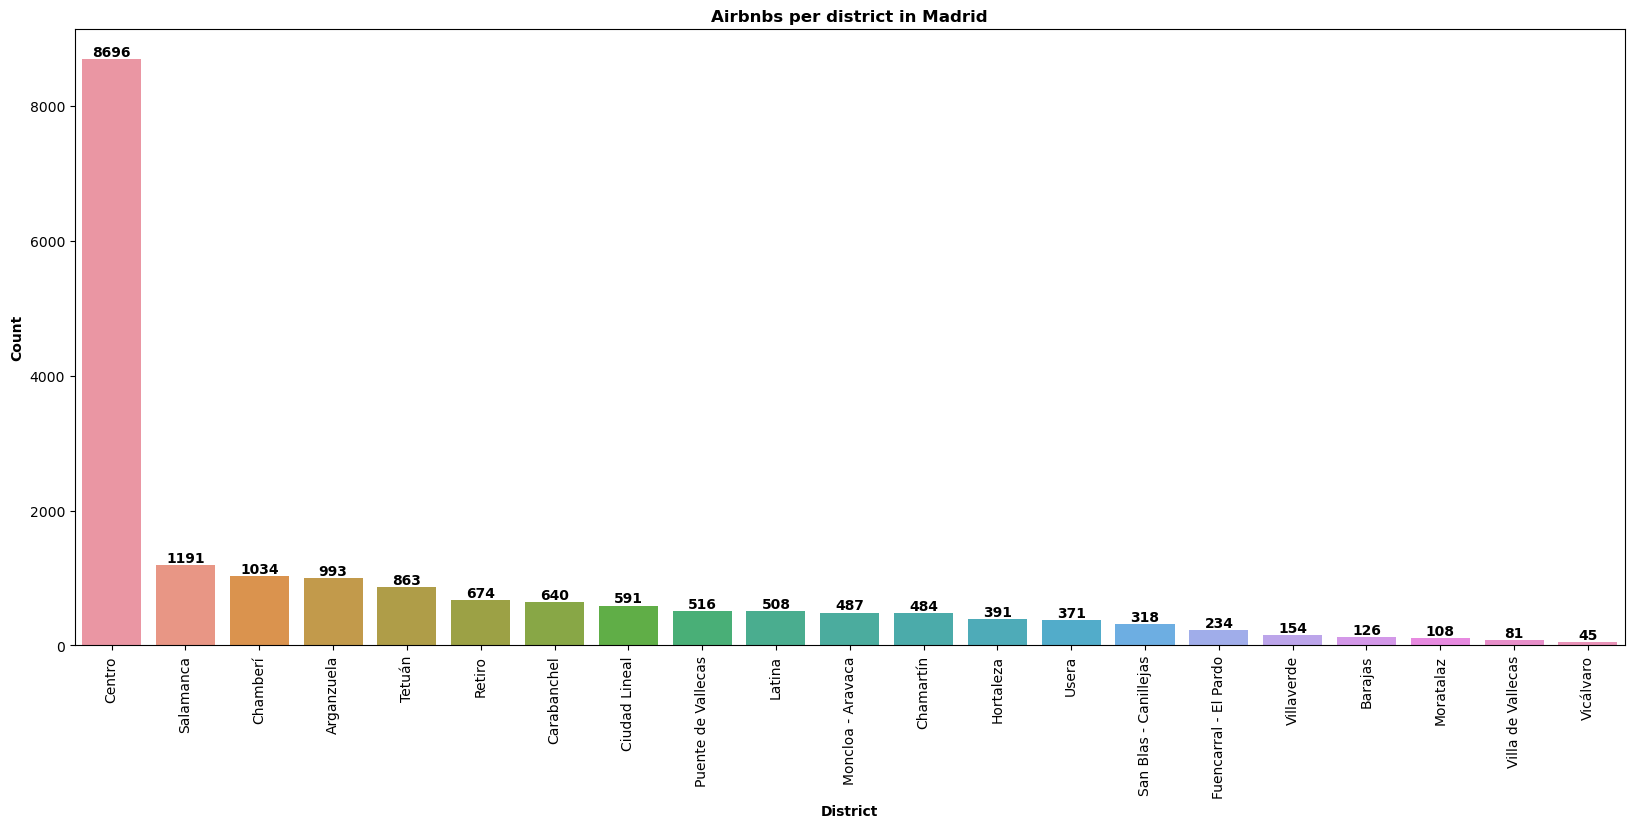

In [155]:
plt.figure(figsize = (20,8))

fig1 = sns.barplot(x = viz1['district'], y = viz1['count'], order = viz1.sort_values('count', ascending = False).district)

plt.title('Airbnbs per district in Madrid', fontweight = "bold")
plt.xlabel('District', fontweight = "bold")
plt.ylabel('Count', fontweight = "bold")
plt.xticks(rotation = 90);

ejex = viz1["count"].tolist()
ejey = viz1["count"].tolist()

fig1.bar_label(fig1.containers[0], fontweight = "bold");

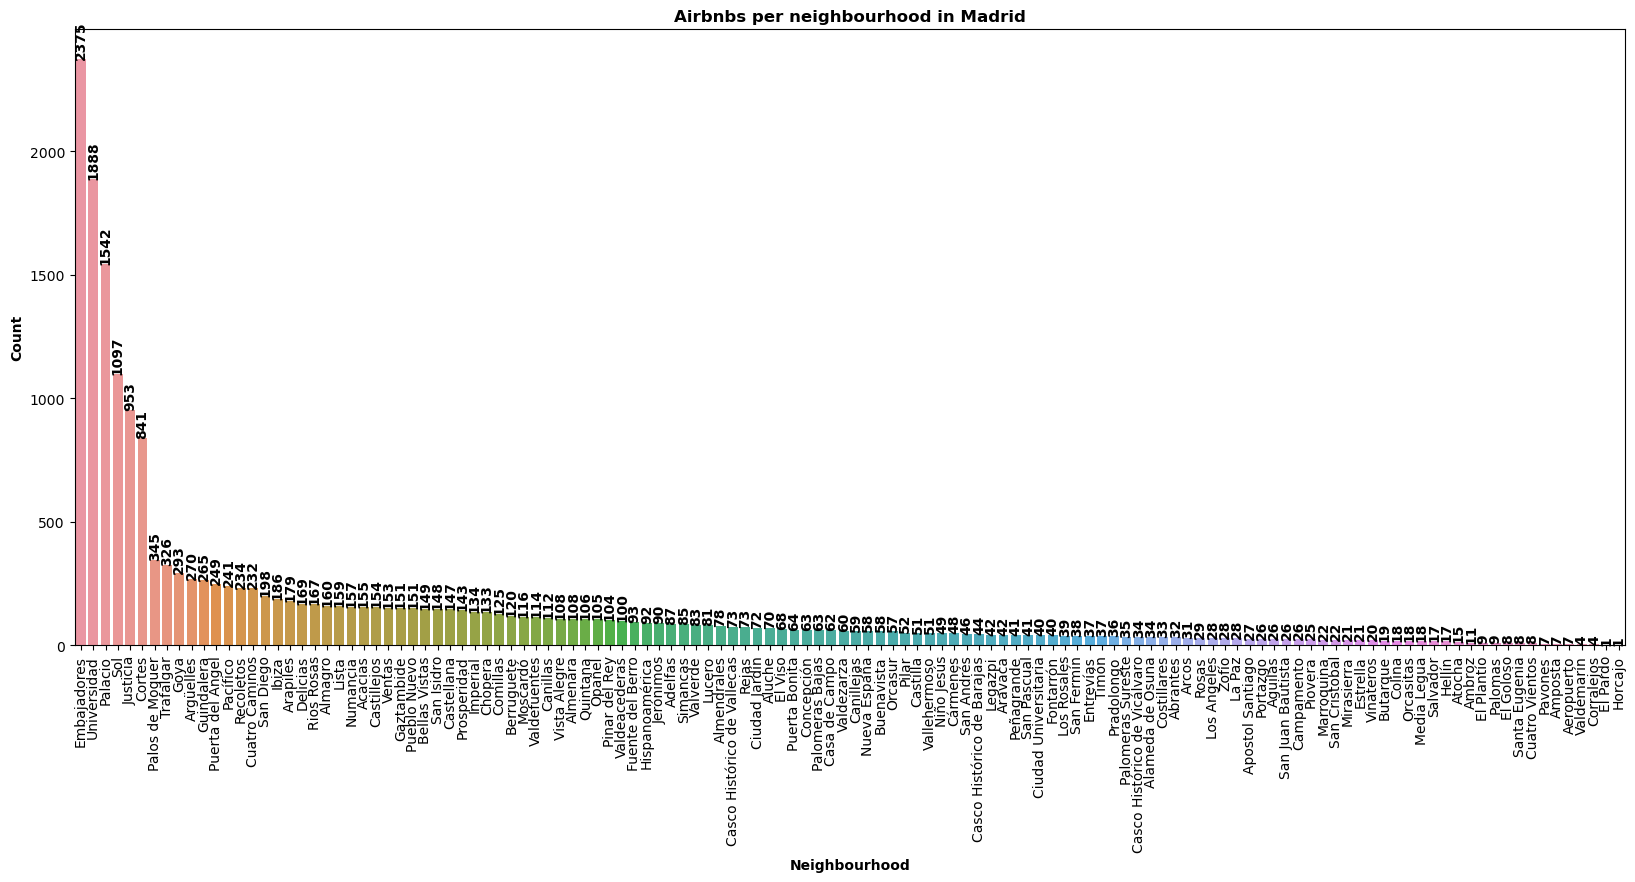

In [161]:
plt.figure(figsize = (20,8))

fig2 = sns.barplot(x = viz2['neighbourhood'], y = viz2['count'], order = viz2.sort_values('count', ascending = False).neighbourhood)

plt.title('Airbnbs per neighbourhood in Madrid', fontweight = "bold")
plt.xlabel('Neighbourhood', fontweight = "bold")
plt.ylabel('Count', fontweight = "bold")
plt.xticks(rotation = 90);

ejex = viz2["count"].tolist()
ejey = viz2["count"].tolist()

fig2.bar_label(fig2.containers[0], fontweight = "bold", rotation = 90);

In [156]:
barrios.drop(['OID_', 'OBJECTID', 'CODDIS', 'COD_BAR', 'Shape_Leng', 'COD_DIS_TX', 'BARRIO_MAY', 'COD_DISBAR', 'NUM_BAR', 'BARRIO_MT', 'COD_DISB', 'Shape_STAr', 'Shape_STLe'], axis=1, inplace=True)
barrios = barrios.rename(columns={'NOMDIS': 'District', 'NOMBRE': 'Neighbourhood'})
barrios

,District,Neighbourhood
0,Villaverde,San Cristóbal
1,Villaverde,Butarque
2,Villaverde,Ángeles
3,Villaverde,Los Rosales
4,Villaverde,Villaverde Alto - Casco Histórico de Villaverde
...,...,...
126,Fuencarral - El Pardo,Valverde
127,Fuencarral - El Pardo,El Goloso
128,Fuencarral - El Pardo,El Pardo
129,Vicálvaro,Casco histórico de Vicálvaro


In [157]:
dictio = pd.Series(barrios.Neighbourhood.values,index=barrios.District).to_dict()

In [158]:
dictio

{'Villaverde': 'Villaverde Alto - Casco Histórico de Villaverde',
 'Usera': 'Moscardó',
 'Villa de Vallecas': 'Santa Eugenia',
 'Carabanchel': 'San Isidro',
 'Latina': 'Puerta del Ángel',
 'Puente de Vallecas': 'Numancia',
 'Arganzuela': 'Imperial',
 'Moratalaz': 'Media Legua',
 'Vicálvaro': 'El Cañaveral',
 'Retiro': 'Ibiza',
 'Centro': 'Universidad',
 'San Blas - Canillejas': 'Rejas',
 'Salamanca': 'Guindalera',
 'Ciudad Lineal': 'Costillares',
 'Moncloa - Aravaca': 'El Plantío',
 'Chamberí': 'Vallehermoso',
 'Chamartín': 'Castilla',
 'Tetuán': 'Almenara',
 'Hortaleza': 'Valdefuentes',
 'Barajas': 'Aeropuerto',
 'Fuencarral - El Pardo': 'El Pardo'}